## Keras: The High-Level Wrapper

Deep Learning frameworks operate at 2 levels of abstractions: Low Level — where mathematical operations and neural network primitives are implemented (TensorFlow, Theano, PyTorch etc.) and High Level — where low level primitives are used to implement neural network abstractions, such as models and layers (Keras).

Keras is a wrapper over its backend libraries, which can be TensorFlow or Theano — meaning that if you’re using Keras with TensorFlow backend, you’re running TensorFlow code. Keras takes care a lot of the nitty-gritty details for you, as it’s geared towards neural network technology consumers and is well suited for those practicing data science. It allows for easy and fast prototyping, supports multiple neural network architectures, and runs seamlessly on CPU/GPU. https://keras.io/

#### The model output can be simply plotted or using Tensorboard, 

In [8]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from time import time

Batch size = 32, Input Dimension = 500, Hidden Dimension = 50

Create the model

model = Sequential()
model.add(Dense(input_dim=500, output_dim=50))
model.add(Activation('relu'))
model.add(Dense(input_dim=50, output_dim=500))

In [9]:
model = Sequential()
model.add(Dense(units=50, input_dim=500))
model.add(Activation('relu'))
model.add(Dense(units=500, input_dim=50))

Define optimizer object

In [10]:
optimizer = SGD(lr=1e0)

Compile the model

In [11]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

Randomize data

In [12]:
x = np.random.randn(32, 500)
y = np.random.randn(32, 500)

### Using Tensorboard to monitor progress

In [13]:
# tensorboard = TensorBoard(log_dir="logss/{}".format(time()))

2023-04-16 16:28:07.372026: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.


In [16]:
# summary = model.fit(x, y, epochs=50, batch_size=64, verbose=1, callbacks=[tensorboard])
summary = model.fit(x, y, epochs=50, batch_size=64, verbose=1)
# tensorboard --logdir=./logss/ 
# localhost:6006

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6714
Epoch 2/50
1/1 [==============================] - 0s 908us/step - loss: 0.6614
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6515
Epoch 4/50
1/1 [==============================] - 0s 752us/step - loss: 0.6414
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6313
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6212
Epoch 7/50
1/1 [==============================] - 0s 802us/step - loss: 0.6111
Epoch 8/50
1/1 [==============================] - 0s 850us/step - loss: 0.6009
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 0.5907
Epoch 10/50
1/1 [==============================] - 0s 692us/step - loss: 0.5806
Epoch 11/50
1/1 [==============================] - 0s 1ms/step - loss: 0.5704
Epoch 12/50
1/1 [==============================] - 0s 763us/step - loss: 0.5603
Epoch 13/50
1/1 [==============================] - 0s 855us/s

### Alternatively, fit the model and plot the loss

In [ ]:
# summary = model.fit(x, y, epochs=50, batch_size=64, verbose=0) # verbose=1

In this example doing similar neural network training as above, I first define the model object as a sequence of layers, then define the optimizer object. Next, I build the model, specify loss function, and train the model with a single ‘fit’ line.

list all data in summary

In [7]:
print(summary.history.keys())

dict_keys(['loss'])


In [9]:
print (type(summary))

<class 'keras.callbacks.History'>


summarize history for loss

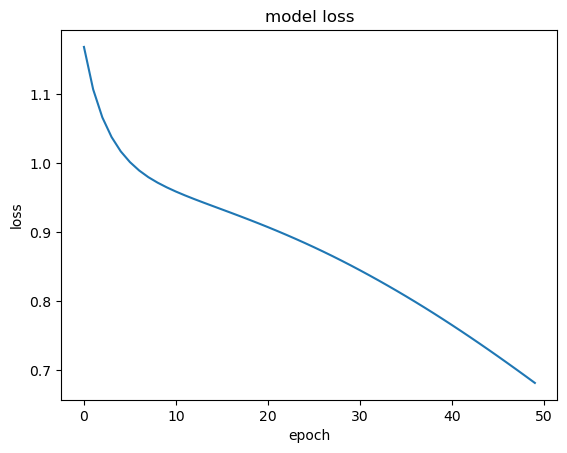

In [15]:
plt.plot(summary.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()